# 3F8 Lab - Inference

In [37]:
import matplotlib.pyplot as plt

## Given Functions

In [38]:
##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data_internal(X, y):
    x_min, x_max = X[ : , 0 ].min () - 0.5 , X[ : , 0 ].max () + 0.5
    y_min, y_max = X[ : , 1 ].min () - 0.5 , X[ : , 1 ].max () + 0.5
    xx, yy = np.meshgrid (np.linspace (x_min , x_max , 100) , np.linspace (y_min , y_max , 100))
    plt.figure()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    ax = plt.gca()
    ax.plot(X[y == 0 , 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1 , 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
def plot_data (X, y):
    xx, yy = plot_data_internal (X, y)
    plt.show()


##
# x: input to the logistic function
def logistic(x): return 1.0/(1.0 + np.exp(-x))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# w: current parameter values
def compute_average_ll(X, y, w):
    output_prob = logistic (np.dot(X, w))
    return np.mean (y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))


##
# ll: 1d array with the average likelihood per data point and dimension equal
# to the number of training epochs.
def plot_ll(ll):
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log - likelihood')
    plt.title('Plot Average Log - likelihood Curve')
    plt.show()


##
# x: 2d array with input features at which to compute predictions.
# (uses parameter vector w which is defined outside the function's scope)
def predict_for_plot(x):
    x_tilde = np.concatenate((x, np.ones((x.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))


##
# X: 2d array with the input features
# y: 1d array with the class labels (0 or 1)
# predict : function that recives as input a feature matrix and returns a 1d
# vector with the probability of class 1.
def plot_predictive_distribution(X, y, predict):
    xx , yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_predict = np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)
    Z = predict(X_predict)
    Z = Z.reshape(xx. shape )
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)
    plt.show()
    
    ##
# l: hyper - parameter for the width of the Gaussian basis functions
# Z: location of the Gaussian basis functions
# X: points at which to evaluate the basis functions
def expand_inputs(l, X, Z):

    X2 = np.sum(X**2 , 1)   #squared every element and then sums the two columns into one "radial squared distance"
    Z2 = np.sum(Z**2 , 1)
    ones_Z = np.ones (Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2 , ones_Z ) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)

##
# x: 2d array with input features at which to compute the predictions using the feature expansion
# ( uses parameter vector w and the 2d array X with the centers of the basis
# functions for the feature expansion , which are defined outside the function's scope )
def predict_for_plot_expanded_features(x):  #x s sze (10000,2)
    x_expanded = expand_inputs(l, x, centers)
    x_tilde = np.concatenate(( x_expanded, np.ones((x_expanded.shape[ 0 ], 1 ))), 1)
    return logistic(np.dot(x_tilde, w))

## Section A, B & C

Using the classification


$$ y_n = \begin{cases}
    1,       & \quad \text{Class A}\\
    0,       & \quad \text{Class B}
  \end{cases} $$
  
  we can combine the two experssions for the log likelihood of each case into a single expression for the gradient: <br>

$$\begin{equation}
\frac{\partial}{\partial \boldsymbol{\beta}} L(\boldsymbol \beta) = \sum_{n = 0}^{N} [y_n - \sigma(\boldsymbol \beta^T \tilde{\textbf x}_{n} )]\tilde{\textbf x}_{n}
\end{equation}$$

<br> This is incorporated into the training function


plot all data


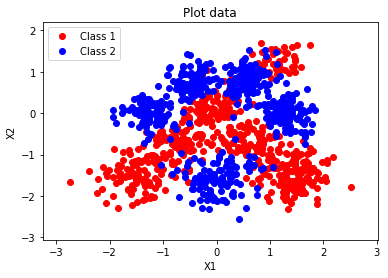

In [39]:
## A, B, C - Preliminary Maths, Load and visualise data
    
import numpy as np

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')
X_tilde = np.append(X, np.ones((1000,1)), axis=1) #create X_tilde

print("plot all data")
plot_data(X, y)

## Section D

In [40]:
#####################
## D - split data set

Num_train = 700
X_training =  X[0:Num_train,:]
y_training = y[0:Num_train]

X_test = X[Num_train:,:]
y_test = y[Num_train:]

X_tilde_train = np.concatenate((X_training, np.ones((X_training.shape[0], 1))), 1)
X_tilde_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), 1)

The data sets were then split into a training set of length 700 and test set of length 300. 700 was chosen because the data set is not very large and a good number of data point are needed for useful training.

A classifier with a linear class boundary is unlikely to perform well on this data set because the data is not linear – it is spread out into “groups” on a two dimensional surface.

## Section E

The training rate is chosen based on the number of iterations of beta that you go through. A high training rate has the problem of overshooting, so the rate must be kept fairly low. Very low training rates take a large number of iterations to get to a maximum log-likelihood, but a large number of iterations may also cause over training of your classifier leading to decreased performance against
test results. Therefore, a reasonable number of iterations with a sufficiently low (but not too low) training rate is ideal.

In [43]:
def gradient(X_, y_, beta_):
    sigma = logistic(np.dot(X_, beta_))
    return np.dot((y_ - sigma), X_)

def train(y_train, X_t_train, y_t, X_tilde_t, alpha):
    iterations = 500
    ll_training = np.zeros([iterations]); ll_test = np.zeros([iterations])     #initialise log likelyhood array for training and test data
    beta = np.random.randn(X_t_train.shape[1])

    #gradient ascent to train data
    for n in range(0, iterations):
        
        gradients = gradient(X_t_train, y_train, beta)
        beta = beta + alpha*gradients
        
        ll_training[n] = compute_average_ll(X_t_train, y_train, beta) # compute log likelyhood of each iteration
        ll_test[n] = compute_average_ll(X_tilde_t, y_t, beta)
        
        
    print("\n plot log likelihood of training data as a function of the number of iterations")
    plot_ll(ll_training)
    print("\n plot log-likelihood of test data (using gradients calculated from training data) vs iterations")
    plot_ll(ll_test)
    
    print("Final training log-likelihood per data point = " +  str(ll_training[-1]))   #note [-1] gives the last element in an array
    print("Final test log-likelihood per data point = " +  str(ll_test[-1]))

    return beta



 plot log likelihood of training data as a function of the number of iterations


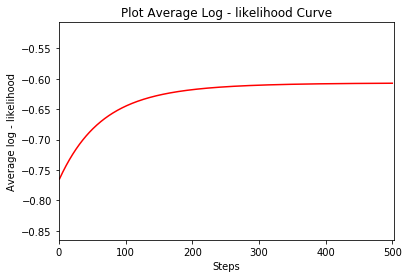


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


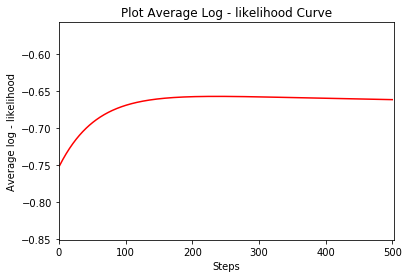

Final training log-likelihood per data point = -0.607386818459
Final test log-likelihood per data point = -0.661523590325

 plot probability contours on training data


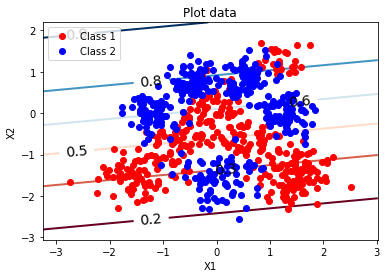


 plot probability contours on test data


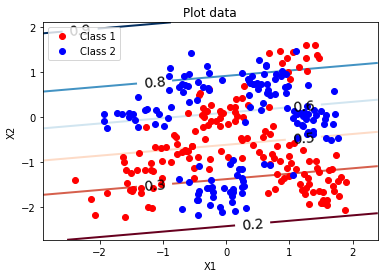

In [44]:
###################################################
## E - train classifier and plot probability contours

rate = 0.00005
beta = train(y_training, X_tilde_train, y_test, X_tilde_test, rate)
w = beta

#note that "predict for plot" generates X_tilde therefore only send X_training, not X_tilde_train
print("\n plot probability contours on training data")
plot_predictive_distribution(X_training, y_training, predict_for_plot)  #plot linear classifiers on plot
print("\n plot probability contours on test data")
plot_predictive_distribution(X_test, y_test, predict_for_plot) 

## Section F

In [45]:
def confusion_matrix(y, X_tilde, beta):
    #apply thresholds to test data, use logistic classification from part A
    # p(y(n) = 1 | x_tilde(n)) = sigma(beta.T * x_tilde(n))
    # p(y(n) = 0 | x_tilde(n)) = 1 - sigma(beta.T * x_tilde(n))
    #use if p(y(n) | x_tilde(n)) > 0.5 then y(n) = 1
    
    #the logistic function just transforms weighted data to be between 0 and 1
    prob_y = logistic(np.dot(beta, X_tilde.T)) 
    
    #threshold each value of prob_y and if >0.5 assign assigned_y a value of 1 (true)
    assigned_y = []
    for n in range(0, len(y)):
        if prob_y[n] > 0.5:
            assigned_y.append(1)
        else:
            assigned_y.append(0)
            
    #compare assigned_y to true_y     
    true_negatives = 0; true_positives = 0; false_negatives = 0; false_positives = 0
    total_pos = 0
    
    for n in range(0, len(y)):
        #count the total number of negatives & positives
        if y[n] == 1: total_pos += 1
        
        #count the number of true_positives etc
        if (assigned_y[n] == 1) and y[n] == 1:
            true_positives += 1
        elif (assigned_y[n] != 1) and y[n] == 1:
            false_negatives += 1
        elif (assigned_y[n] == 0) and y[n] == 0:
            true_negatives += 1
        else:
            false_positives += 1
            
    #divide by number of tests to get fractions
    true_negatives /= (len(y) - total_pos); true_positives /= total_pos; false_negatives /= total_pos; false_positives /= (len(y) - total_pos)
    
    print("\n\nConfusion Matrix:\n")
    print("True negative/total negatives  = {}   |   False positive/total negatives = {}".format(true_negatives,false_positives))
    print("False negative/total positives = {}   |   True positive/total positives  = {}".format(false_negatives,true_positives))


In [46]:
######################
## F- confusion matrix
confusion_matrix(y_test, X_tilde_test, beta)



Confusion Matrix:

True negative/total negatives  = 0.6815286624203821   |   False positive/total negatives = 0.3184713375796178
False negative/total positives = 0.32867132867132864   |   True positive/total positives  = 0.6713286713286714


For the linear classifier, the final log likelihoods are better than random, ln(0.5) ≈ -0.69, but still not very good. The test data does not have as good of a likelihood as the training data. This may be because of over-training. The confusion matrix confirms this.

## Section G

Using radial basis functions a similar procedure can be performed as in sections E and F.


 plot log likelihood of training data as a function of the number of iterations


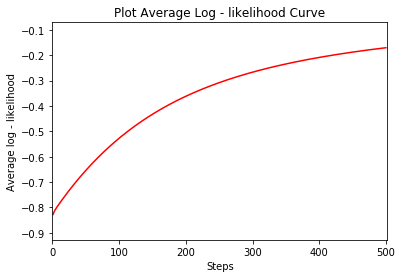


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


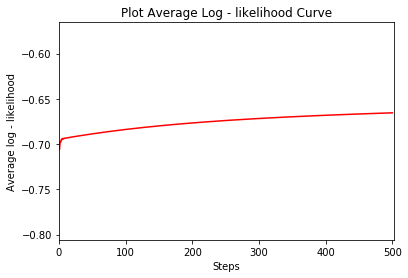

Final training log-likelihood per data point = -0.170221219662
Final test log-likelihood per data point = -0.665461198846

plot probability contours on training data


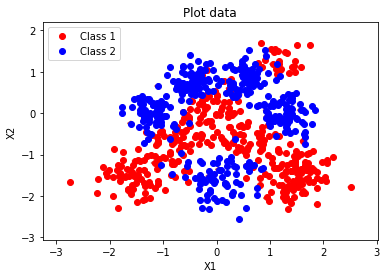


plot probability contours on test data


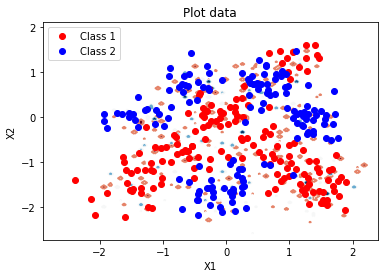



Confusion Matrix:

True negative/total negatives  = 0.9872611464968153   |   False positive/total negatives = 0.012738853503184714
False negative/total positives = 0.8881118881118881   |   True positive/total positives  = 0.11188811188811189

 plot log likelihood of training data as a function of the number of iterations


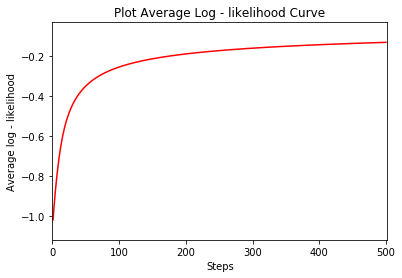


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


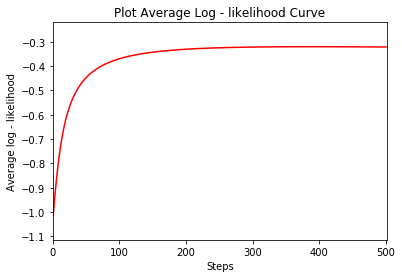

Final training log-likelihood per data point = -0.132488458164
Final test log-likelihood per data point = -0.321488122287

plot probability contours on training data


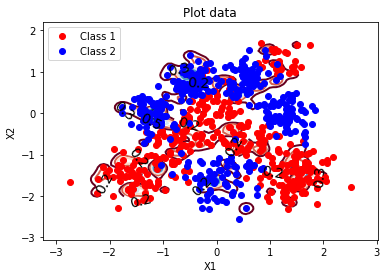


plot probability contours on test data


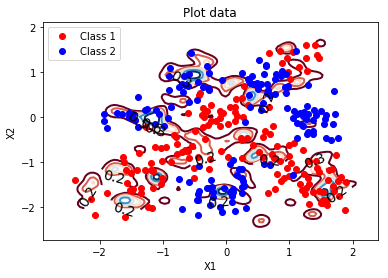



Confusion Matrix:

True negative/total negatives  = 0.910828025477707   |   False positive/total negatives = 0.08917197452229299
False negative/total positives = 0.1258741258741259   |   True positive/total positives  = 0.8741258741258742

 plot log likelihood of training data as a function of the number of iterations


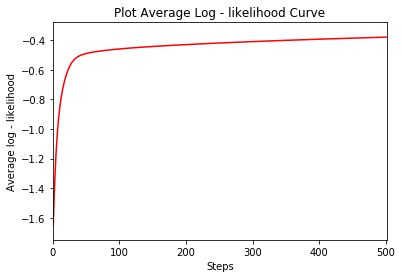


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


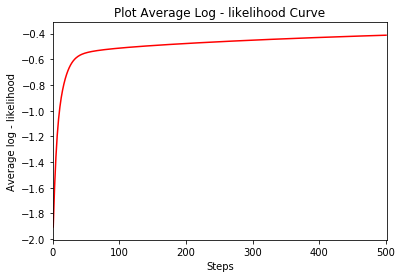

Final training log-likelihood per data point = -0.379138794374
Final test log-likelihood per data point = -0.412156687769

plot probability contours on training data


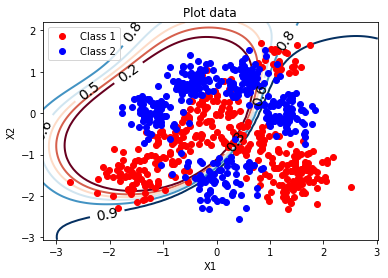


plot probability contours on test data


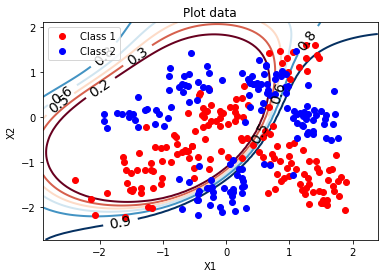



Confusion Matrix:

True negative/total negatives  = 0.7770700636942676   |   False positive/total negatives = 0.2229299363057325
False negative/total positives = 0.0979020979020979   |   True positive/total positives  = 0.9020979020979021


In [47]:
##############################
## G & H - Radial basis functions

centers = X_training  ##dont need x_tilde_train since we are interested in coordinates

#repeat for different standard deviations of the gaussian
basis_size = [0.01, 0.1, 1]; training_rates = [0.012, 0.0055, 0.000035]; i = 0
for l in basis_size:
    X_tilde_rbf_train = np.c_[np.ones(y_training.shape[0]), expand_inputs(l, X_training, centers)] #creates "x_tilde" for rfb x's
    X_tilde_rbf_test = np.c_[np.ones(y_test.shape[0]), expand_inputs(l, X_test, centers)]   
    
    rate_rbf = training_rates[i] # learning rate
    #print("ytrain: " + str(y_training.shape) + "   X_tilde_rbf_train: " +str(X_tilde_rbf_train.shape) + "   y_test: " +str(y_test.shape) + "      X_tilde_rbf_test: " + str(X_tilde_rbf_test.shape))
    beta_rbf = train(y_training, X_tilde_rbf_train, y_test, X_tilde_rbf_test, rate_rbf)
    w = beta_rbf
    
    #note that "predict for plot" generates X_tilde therefore only send X_training, not X_tilde_train
    #print("X: " + str(X.shape) + "  y: " +str(y.shape) + "    beta_rbf: " + str(beta_rbf.shape))
    print("\nplot probability contours on training data")
    plot_predictive_distribution(X_training, y_training, predict_for_plot_expanded_features)  #plot linear classifiers on plot
    print("\nplot probability contours on test data")
    plot_predictive_distribution(X_test, y_test, predict_for_plot_expanded_features) 
    confusion_matrix(y_test, X_tilde_rbf_test, beta_rbf)
    
    i = i + 1

L = 0.01, the kernels are so small that they only cover one result and subsequently over-train the data by default. The classification method in this case is worse than random.

L = 0.1, the kernels are almost the right size and hence makes a very good classifier.

L = 1, the kernels too large and hence can’t classify anything effectively.

# Full Technical Report Sections

## Section A


 plot log likelihood of training data as a function of the number of iterations


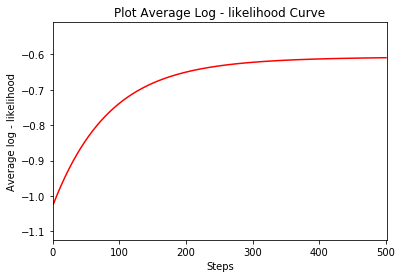


 plot log-likelihood of test data (using gradients calculated from training data) vs iterations


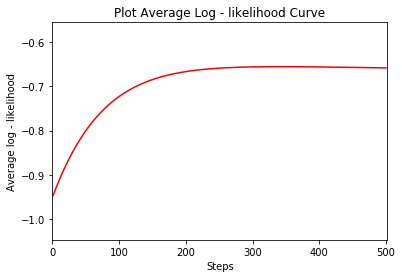

Final training log-likelihood per data point = -0.609085419863
Final test log-likelihood per data point = -0.658338521972
8.08766246878e-12
0.506183738375


NameError: name 'scipy' is not defined

In [49]:
#Logistic posterior. 
#Not normalised as only interested in gradient

def posterior(y_, X_tilde_, w_):
    var = 0.5
    sigma = logistic(np.dot(X_tilde_, w_))
    
    ##create an array of likelihoods
    likelihood = np.power(sigma, y_)*np.power((1-sigma),(y_-1))
    tot_like = np.prod(likelihood) #multiply all elements together
    print(tot_like)

    prior = np.exp(-0.5*np.dot(w_, w_)/var)
    print(prior)
    
    return tot_like*prior

    
beta = train(y_training, X_tilde_train, y_test, X_tilde_test, rate)

posterior_train = posterior(y_training, X_tilde_train, beta)

init_w = [1, 1, 1]
scipy.optimize.fmin_l_bfgs_b(posterior, init_w, gradients())
#gradients = (np.dot((y_train - sigma), X_t_train))
#beta = beta + alpha*gradients

